In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
np.set_printoptions(precision = 5, suppress = True)
%matplotlib inline

### Import all the Datasets

In [2]:
fao = pd.read_csv("FAO.csv", encoding='latin-1')
clima_change = pd.read_csv("FAOSTAT_data_3-24-2022.csv", encoding='latin-1')
food_production = pd.read_csv("food_production.csv", encoding='latin-1')

In [3]:
food_production.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


<li>1-8 emissioni CO2 (kg/kg) --> total
<li>9-11 eutrofizzazione (fosfati g/kcal-prot-kg) --> kg
<li>12-14 prelievi acqua dolce (l/kcal-prot-kg) --> kg
<li>15-16 emissioni gas serra CO2eq (kg/kcal-prot) --> non usare
<li>17-19 consumo suolo (m2/kcal-kg-prot) --> kg
<li>20-22 consumo acqua ponderato da scarsità (l/kg-prot-kcal) --> kg


ho selezionato unicamente le colonne che considerano l'impatto ambientale in funzione dei kg degli alimenti prodotti per effettuare una valutazione equa, scartando il contributo calorico e proteico del singolo alimento perché ogni alimento possiede valori nutritivi differenti (non ha senso considerare l'impatto ambientale in funzione delle proteine prodotte se tale alimento non contiene proteine, discorso analogo per l'apporto calorico) e per considerare tali colonne è necessario avere a disposizione i dati riguardanti una dieta equilibrata, qui mancanti. 

In [4]:
FoodProd_cleaned = food_production.iloc[:,[8,10,14,18,20]] #seleziono dati utili
FoodProd_cleaned.fillna(0, inplace=True) #sostituisco i NaN
FoodProd_norm = (FoodProd_cleaned - FoodProd_cleaned.min() ) / (FoodProd_cleaned.max() - FoodProd_cleaned.min() ) #normalizzazione
FoodProd_norm.insert(0, "Food product", food_production["Food product"]) #inserisco colonna nomi
FoodProd_norm["impact"] = FoodProd_norm.sum(axis=1).sort_values(ascending=False) #inserisco colonna impatto

FoodProd_norm.sort_values(by= ["impact"], ascending=False, inplace=True) #riordino valori
FoodProd_norm.head(15) #visualizzo i 5 alimenti con l'impatto ambientale maggiore

,Food product,Total_emissions,Eutrophying emissions per kilogram (gPOâeq per kilogram),Freshwater withdrawals per kilogram (liters per kilogram),Land use per kilogram (mÂ² per kilogram),Scarcity-weighted water use per kilogram (liters per kilogram),impact
33,Beef (beef herd),1.000000,0.825125,0.258902,0.882102,0.151083,3.117213
39,Cheese,0.353535,0.269293,1.000000,0.237392,0.786684,2.646904
35,Lamb & Mutton,0.409091,0.265898,0.321630,1.000000,0.617361,2.613980
34,Beef (dairy herd),0.351852,1.000000,0.484247,0.116925,0.521142,2.474165
11,Nuts,0.000000,0.052424,0.737494,0.035045,1.000000,1.824963
41,Fish (farmed),0.082492,0.643653,0.658549,0.022741,0.180835,1.588271
19,Olive Oil,0.097643,0.102001,0.382109,0.071145,0.772023,1.424921
36,Pig Meat,0.117845,0.209094,0.320381,0.046943,0.290867,0.985131
32,Dark Chocolate,0.311448,0.238386,0.096446,0.186474,0.012524,0.845278
4,Rice,0.063973,0.096006,0.401128,0.007571,0.215652,0.784330


Text(0.5, 1.0, 'food environmental impact')

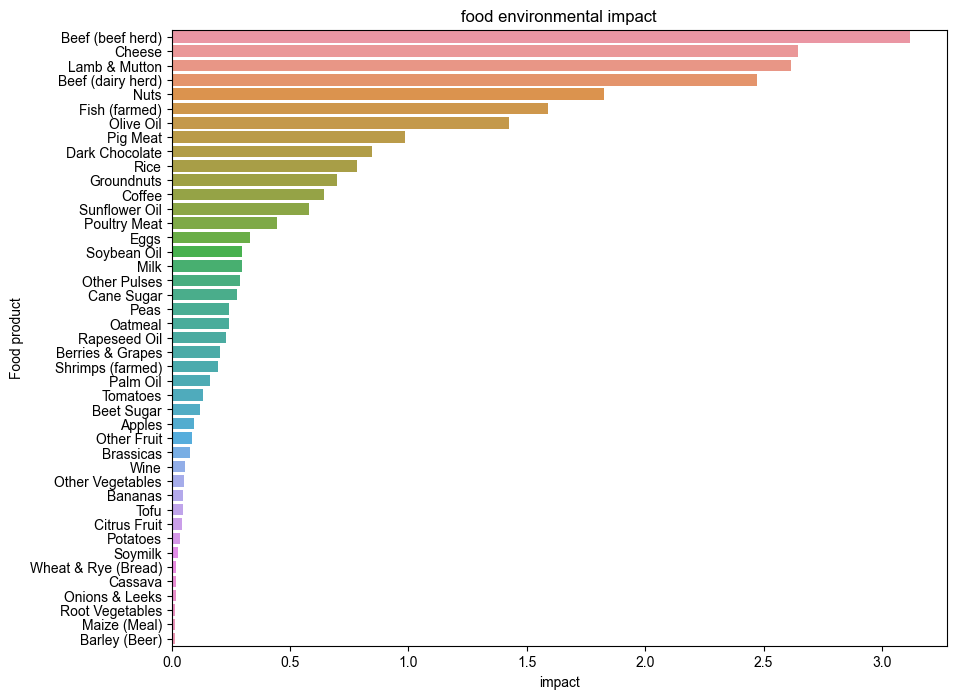

In [5]:
#traccio il grafico dell'impatto ambientale di tutti gli alimenti
fig, ax = plt.subplots(figsize=(10,8))
ax_impact = sns.barplot(x= FoodProd_norm["impact"], y= FoodProd_norm["Food product"], ax= ax)
sns.set_theme()
plt.title("food environmental impact")


Text(0.5, 1.0, 'worst 5 foods environmental impact')

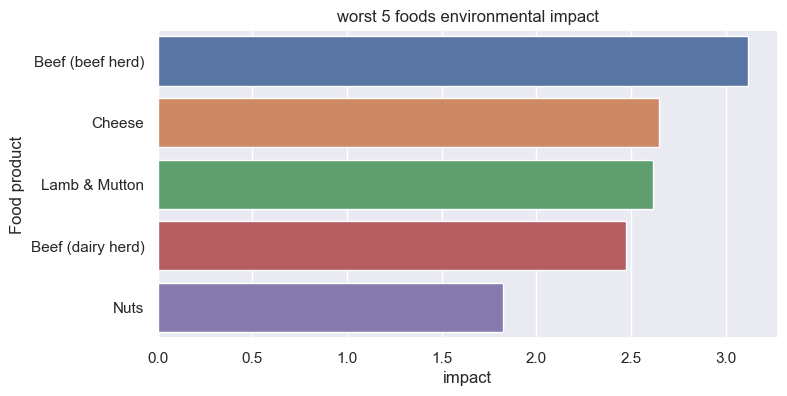

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
ax_impact = sns.barplot(x= FoodProd_norm["impact"].head(), y= FoodProd_norm["Food product"].head(), ax= ax)
plt.title("worst 5 foods environmental impact")

Individuare i paesi che hanno ridotto maggiormente l'impatto ambientale

In [7]:
# 2 strade:
# -valutare paesi che nel corso del tempo hanno ridotto di più i cambiamenti climatici
#
# -valutare paesi che hanno modificato coltivazioni/allevamenti per favorire riduzione cambiamenti climatici

In [8]:
clima_change.head()

,ï»¿Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


In [9]:
clima_change.shape

(267665, 14)

Text(0.5, 1.0, 'World Climate Change per year')

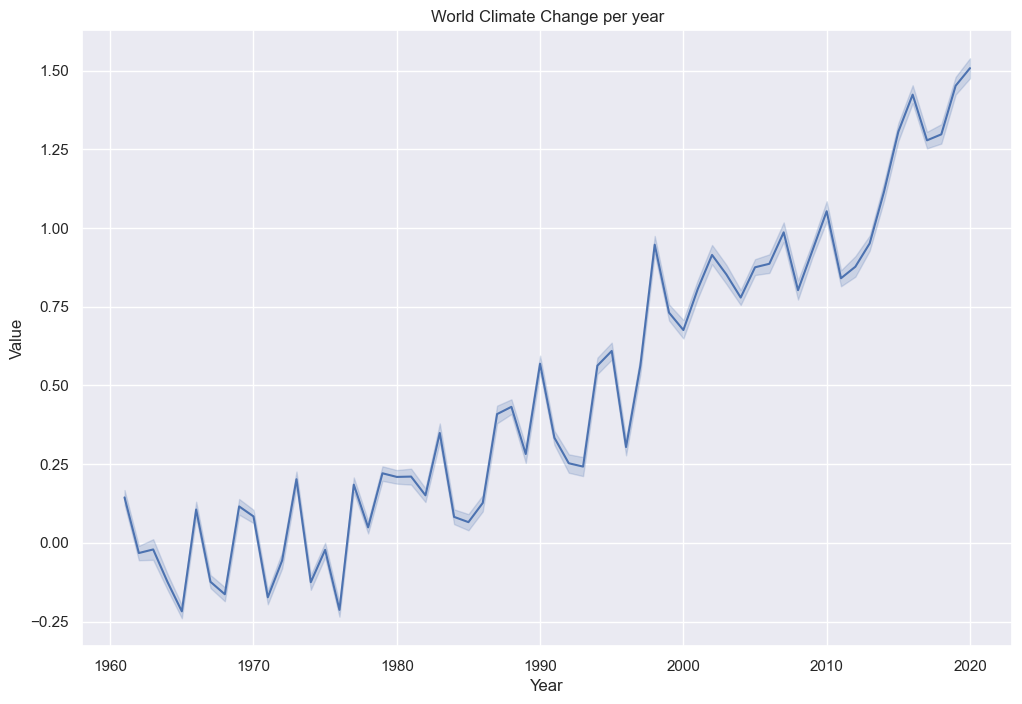

In [10]:
#cambiamenti climatici nel mondo in ogni anno
plt.subplots(figsize=(12,8))
sns.lineplot(x="Year", y="Value", data=clima_change)
plt.title("World Climate Change per year")


Dal grafico si osserva che i cambiamenti maggiori sono avvenuti negli ultimi 25 anni, restringiamo quindi la ricerca considerando i dati dal 2000 al 2020:

In [11]:
cond= clima_change["Year"] >= 1995 #restringiamo lo studio agli ultimi 20 anni
clima_change_clean = clima_change[cond]
clima_change_clean.head()

,ï»¿Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
34,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1995,1995,?C,1.322,Fc,Calculated data
35,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1996,1996,?C,-0.684,Fc,Calculated data
36,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1997,1997,?C,1.444,Fc,Calculated data
37,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1998,1998,?C,0.857,Fc,Calculated data
38,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1999,1999,?C,0.766,Fc,Calculated data


Text(0.5, 1.0, 'World Climate Change per year')

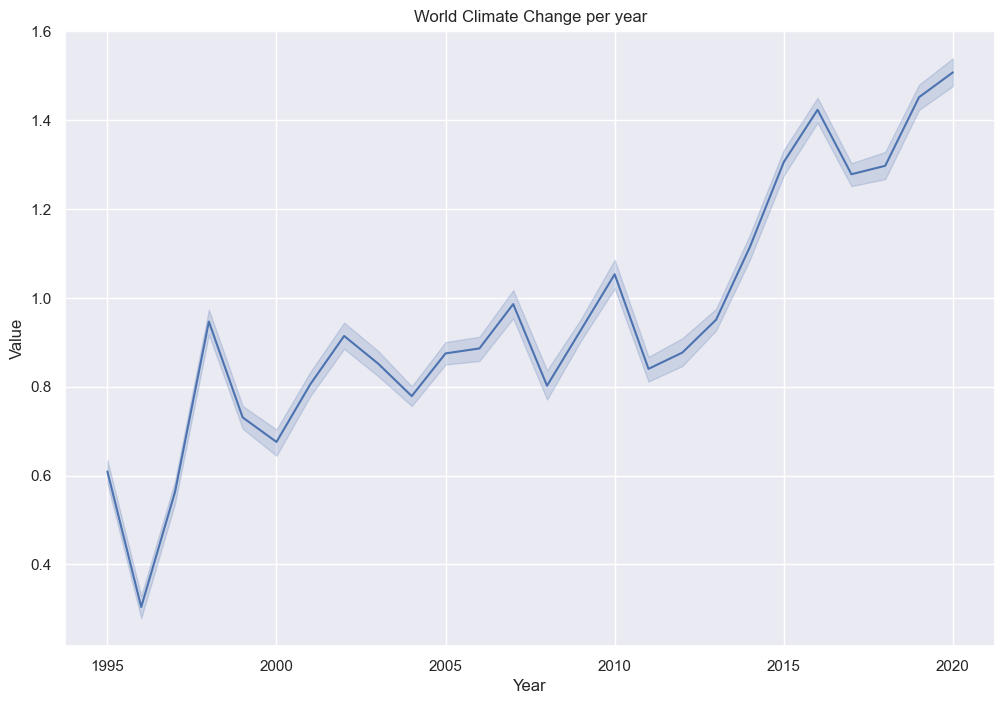

In [12]:
plt.subplots(figsize=(12,8))
sns.lineplot(x="Year", y="Value", data=clima_change_clean)
plt.title("World Climate Change per year")

In [13]:
# 1 impatto ambientale:
climaChange_mean = clima_change_clean.groupby(["Area","Year"])["Value"].mean() #media del cambiamento climatico all'anno per ogni area
climaChange_mean

Area         Year
Afghanistan  1995    0.348588
             1996    0.035118
             1997    0.371706
             1998    0.733765
             1999    1.103294
                       ...   
Zimbabwe     2016    1.372176
             2017    0.408647
             2018    0.791588
             2019    1.408647
             2020    0.674882
Name: Value, Length: 7145, dtype: float64

In [14]:
climaChange_mean_time = climaChange_mean.groupby("Area").mean().sort_values(ascending=False).dropna().drop("Midway Island").drop("Pitcairn") #media del cambiamento climatico per ogni area nel periodo complessivo ordinata
print(climaChange_mean_time.head(10))
print("\n")
print(climaChange_mean_time.tail(10))

Area
Svalbard and Jan Mayen Islands    2.234645
Russian Federation                1.593747
Estonia                           1.580910
Belarus                           1.573328
Eastern Europe                    1.569410
Serbia                            1.559031
Finland                           1.554197
Luxembourg                        1.541308
Latvia                            1.531217
Montenegro                        1.520184
Name: Value, dtype: float64


Area
Eswatini                                        0.477815
French Polynesia                                0.471853
Argentina                                       0.462319
South Georgia and the South Sandwich Islands    0.442800
Antarctica                                      0.390364
Wake Island                                     0.386618
Marshall Islands                                0.316833
Solomon Islands                                 0.304710
Chile                                           0.302889
Micronesia (Feder

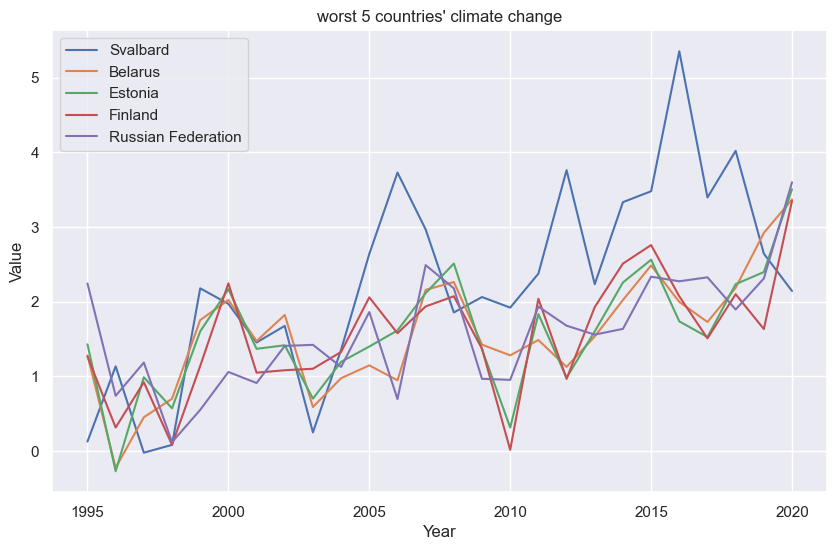

In [15]:
CC_Svalbard = climaChange_mean["Svalbard and Jan Mayen Islands"]
CC_Belarus = climaChange_mean["Belarus"]
CC_Estonia = climaChange_mean["Estonia"]
CC_Finland = climaChange_mean["Finland"]
CC_Russia = climaChange_mean["Russian Federation"]

plt.subplots(figsize=(10,6))
sns.lineplot(data= CC_Svalbard, label= "Svalbard")
sns.lineplot(data= CC_Belarus, label= "Belarus")
sns.lineplot(data= CC_Estonia, label= "Estonia")
sns.lineplot(data= CC_Finland, label= "Finland")
sns.lineplot(data= CC_Russia, label= "Russian Federation")

plt.title("worst 5 countries' climate change")
plt.legend()

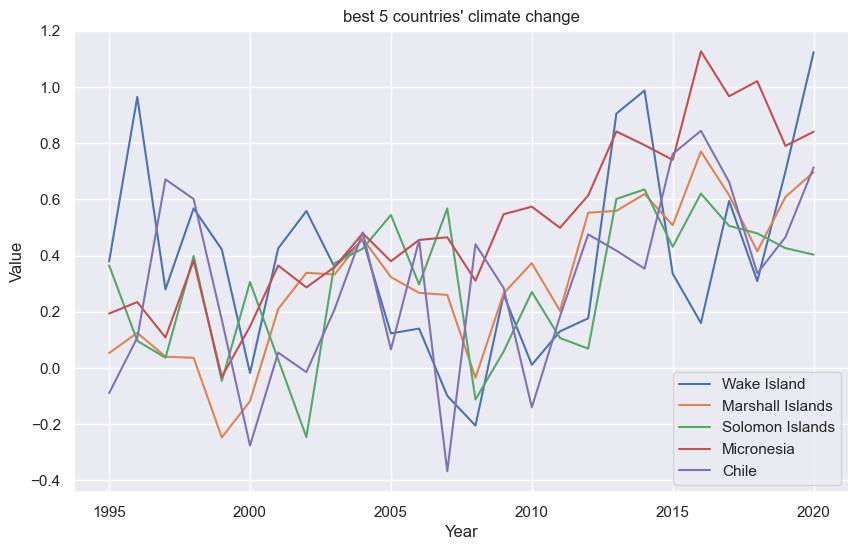

In [16]:
CC_Wake = climaChange_mean["Wake Island"]
CC_Marshall = climaChange_mean["Marshall Islands"]
CC_Solomon = climaChange_mean["Solomon Islands"]
CC_Micronesia = climaChange_mean["Micronesia"]
CC_Chile = climaChange_mean["Chile"]

plt.subplots(figsize=(10,6))
sns.lineplot(data= CC_Wake, label= "Wake Island")
sns.lineplot(data= CC_Marshall, label= "Marshall Islands")
sns.lineplot(data= CC_Solomon, label= "Solomon Islands")
sns.lineplot(data= CC_Micronesia, label= "Micronesia")
sns.lineplot(data= CC_Chile, label= "Chile")

plt.title("best 5 countries' climate change")
plt.legend()

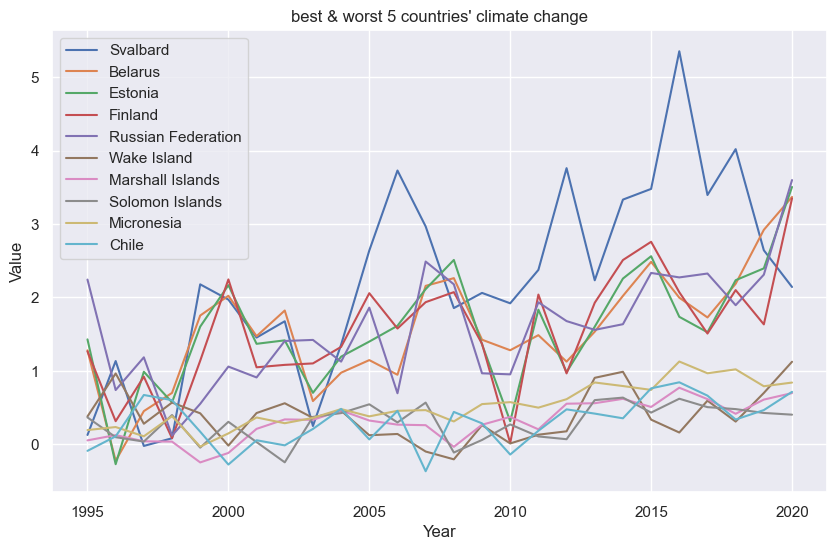

In [17]:
plt.subplots(figsize=(10,6))
sns.lineplot(data= CC_Svalbard, label= "Svalbard")
sns.lineplot(data= CC_Belarus, label= "Belarus")
sns.lineplot(data= CC_Estonia, label= "Estonia")
sns.lineplot(data= CC_Finland, label= "Finland")
sns.lineplot(data= CC_Russia, label= "Russian Federation")
sns.lineplot(data= CC_Wake, label= "Wake Island")
sns.lineplot(data= CC_Marshall, label= "Marshall Islands")
sns.lineplot(data= CC_Solomon, label= "Solomon Islands")
sns.lineplot(data= CC_Micronesia, label= "Micronesia")
sns.lineplot(data= CC_Chile, label= "Chile")

plt.title("best & worst 5 countries' climate change")
plt.legend()

<p>Da quest'ultimo grafico si osserva che mentre alcuni paesi hanno sostanzialmente mantenuto la stessa temperatura, altri hanno subito un aumento considerevole negli ultimi decenni.</p>

<p>Si può notare come i paesi che maggiormente hanno subito il surriscaldamento globale sono quelli situati in prossimità dell'artico, tali effetti sono probabilmente dovuti a causa dello scioglimento dei ghiacci con conseguente riduzione dell'albedo e del loro effetto di assorbimento del calore. In particolare la Russia e la Finlandia si sono rivelati gli stati più vulnerabili, in questi paesi è in corso lo scioglimento del permafrost della tundra.</p>

<p>Gli stati che invece hanno subito meno di tutti il riscaldamento sono tutti quelli che si trovano nell'oceano pacifico, il più grande della Terra. Gli oceani, essendo grandi masse d'acqua, nota per il calore specifico molto più alto delle altre sostanze, mostrano la loro grande resilienza al fenomeno del surriscaldamento, almeno dal punto di vista dell'aumento della temperatura, tuttavia altri fenomeni interessano maggiormente queste aree: l'innalzamento dei mari e lo sbiancamento dei coralli</p>

In [18]:
years = ['Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013']
fao_clean = fao.drop(columns=['Area Abbreviation','Area Code','latitude','longitude']).groupby(["Area","Item", "Item Code","Element"])[years].mean()
fao_clean = fao_clean.reset_index(level=[1,2]).sort_values(by="Item Code")
fao_clean.head()



,,Item,Item Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,Element,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sudan,Feed,Wheat and products,2511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,59.0
Lesotho,Food,Wheat and products,2511,42.0,44.0,41.0,43.0,49.0,60.0,58.0,55.0,66.0,73.0,75.0,72.0,66.0,77.0,72.0,92.0,106.0,107.0,86.0,86.0,67.0,55.0,107.0,88.0,54.0,59.0,41.0,48.0,60.0,70.0,61.0,86.0,100.0,93.0,78.0,80.0,81.0,82.0,85.0,82.0,84.0,86.0,85.0,83.0,84.0,86.0,87.0,87.0,87.0,88.0,90.0,95.0,109.0
Sweden,Food,Wheat and products,2511,413.0,450.0,474.0,437.0,406.0,475.0,471.0,466.0,448.0,458.0,454.0,433.0,464.0,466.0,462.0,481.0,484.0,475.0,470.0,511.0,515.0,501.0,501.0,518.0,512.0,462.0,459.0,484.0,475.0,499.0,518.0,633.0,661.0,601.0,681.0,680.0,702.0,689.0,719.0,710.0,727.0,729.0,723.0,733.0,733.0,724.0,735.0,734.0,740.0,752.0,719.0,730.0,762.0
Romania,Food,Wheat and products,2511,3110.0,3107.0,3120.0,3147.0,3147.0,3143.0,3127.0,3180.0,3200.0,3032.0,3119.0,3069.0,3035.0,3281.0,2955.0,3078.0,3123.0,3167.0,3039.0,3197.0,3122.0,2679.0,2768.0,2748.0,2801.0,2809.0,2851.0,3044.0,3058.0,3148.0,2570.0,2491.0,2778.0,2771.0,3140.0,3079.0,3258.0,3170.0,3152.0,3158.0,3269.0,3296.0,3113.0,3256.0,3134.0,3014.0,2972.0,2885.0,2896.0,2899.0,2903.0,2915.0,2926.0
"China, Hong Kong SAR",Food,Wheat and products,2511,95.0,132.0,99.0,127.0,107.0,116.0,116.0,139.0,139.0,141.0,160.0,152.0,154.0,165.0,149.0,176.0,176.0,212.0,213.0,206.0,199.0,222.0,234.0,236.0,234.0,255.0,266.0,262.0,272.0,261.0,257.0,247.0,304.0,297.0,317.0,323.0,328.0,306.0,339.0,310.0,319.0,334.0,346.0,360.0,366.0,363.0,370.0,378.0,363.0,385.0,378.0,383.0,383.0


In [19]:
print(dict(zip(fao_clean["Item"].unique(), fao_clean["Item Code"].unique()))) #individuo i codici per ogni alimento


{'Wheat and products': 2511, 'Barley and products': 2513, 'Maize and products': 2514, 'Rye and products': 2515, 'Oats': 2516, 'Millet and products': 2517, 'Sorghum and products': 2518, 'Cereals, Other': 2520, 'Potatoes and products': 2531, 'Cassava and products': 2532, 'Sweet potatoes': 2533, 'Roots, Other': 2534, 'Yams': 2535, 'Sugar cane': 2536, 'Sugar beet': 2537, 'Sugar non-centrifugal': 2541, 'Sugar (Raw Equivalent)': 2542, 'Sweeteners, Other': 2543, 'Beans': 2546, 'Peas': 2547, 'Pulses, Other and products': 2549, 'Nuts and products': 2551, 'Soyabeans': 2555, 'Groundnuts (Shelled Eq)': 2556, 'Sunflower seed': 2557, 'Rape and Mustardseed': 2558, 'Cottonseed': 2559, 'Coconuts - Incl Copra': 2560, 'Sesame seed': 2561, 'Palm kernels': 2562, 'Olives (including preserved)': 2563, 'Oilcrops, Other': 2570, 'Soyabean Oil': 2571, 'Groundnut Oil': 2572, 'Sunflowerseed Oil': 2573, 'Rape and Mustard Oil': 2574, 'Cottonseed Oil': 2575, 'Palmkernel Oil': 2576, 'Palm Oil': 2577, 'Coconut Oil': 25

codici degli alimenti a maggior impatto ambientale:

animal meat 2731-2737,2943,2945-2946
milk 2848
nuts 2551
olive_oil 2580

In [20]:
code = {range(2731,2738), 2848, 2943, 2945, 2946, 2551, 2580}


In [21]:
fao_impact = fao_clean[fao_clean["Item Code"].isin(code)] #creo un DF contenente solo i dati degli alimenti a maggior impatto ambientale
fao_impact['mean'] = fao_impact[years].mean(axis=1)
fao_impact.head()

,,Item,Item Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
Area,Element,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yemen,Food,Nuts and products,2551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,5.0,10.0,6.0,4.0,2.0,4.0,2.0,6.0,1.0,3.0,6.0,4.0,1.169811
Belgium,Food,Nuts and products,2551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,54.0,61.0,64.0,61.0,75.0,83.0,82.0,74.0,65.0,62.0,64.0,69.0,79.0,67.857143
Ukraine,Food,Nuts and products,2551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,78.0,59.0,78.0,80.0,72.0,48.0,29.0,50.0,59.0,52.0,75.0,76.0,79.0,60.0,78.0,63.0,44.0,63.0,64.0,40.0,90.0,63.363636
Croatia,Food,Nuts and products,2551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,9.0,10.0,13.0,10.0,10.0,13.0,13.0,12.0,14.0,13.0,14.0,18.0,17.0,18.0,17.0,19.0,20.0,16.0,13.0,13.0,13.454545
Rwanda,Food,Nuts and products,2551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.018868


Text(0.5, 0, 'year')

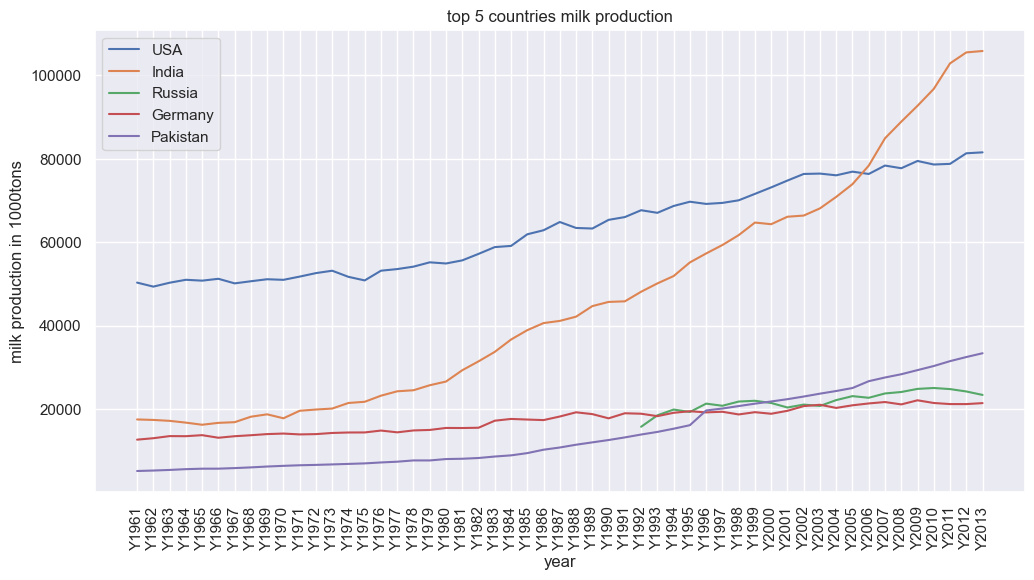

In [22]:
fao_milk = fao_impact[fao_impact["Item Code"] == 2848].sort_values(by= "mean", ascending= False)

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_milk.iloc[0,2:55], label = "USA")
sns.lineplot(data=fao_milk.iloc[1,2:55], label = "India")
sns.lineplot(data=fao_milk.iloc[2,2:55], label = "Russia")
sns.lineplot(data=fao_milk.iloc[3,2:55], label = "Germany")
sns.lineplot(data=fao_milk.iloc[4,2:55], label = "Pakistan")

plt.title("top 5 countries milk production")
plt.xticks(rotation = 90)
plt.ylabel("milk production in 1000tons")
plt.xlabel("year")

Text(0.5, 0, 'year')

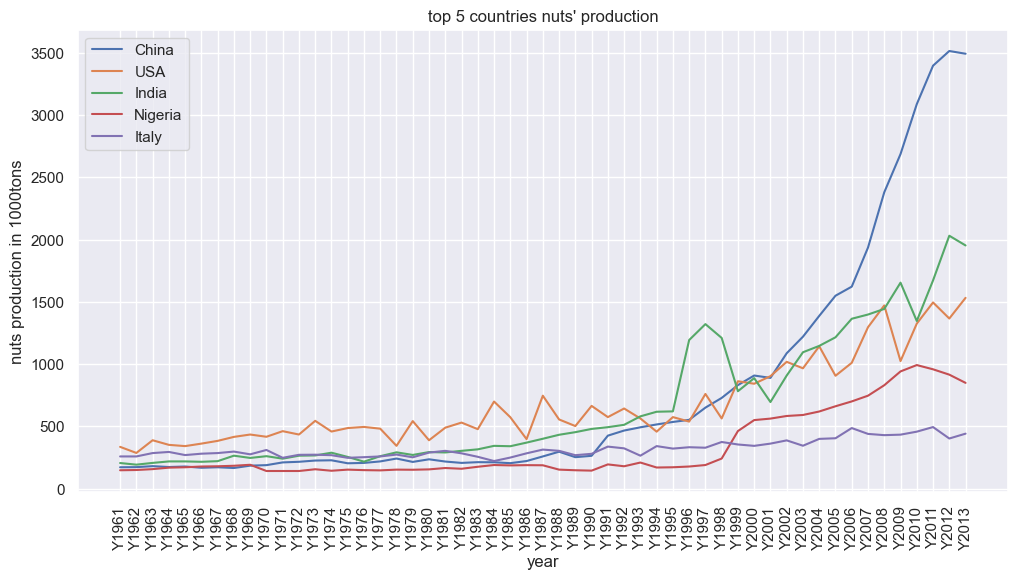

In [23]:
fao_nuts = fao_impact[fao_impact["Item Code"] == 2551].sort_values(by= "mean", ascending= False)

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_nuts.iloc[0,2:55], label = "China")
sns.lineplot(data=fao_nuts.iloc[1,2:55], label = "USA")
sns.lineplot(data=fao_nuts.iloc[2,2:55], label = "India")
sns.lineplot(data=fao_nuts.iloc[3,2:55], label = "Nigeria")
sns.lineplot(data=fao_nuts.iloc[4,2:55], label = "Italy")

plt.title("top 5 countries nuts' production")
plt.xticks(rotation = 90)
plt.ylabel("nuts production in 1000tons")
plt.xlabel("year")

Text(0.5, 0, 'year')

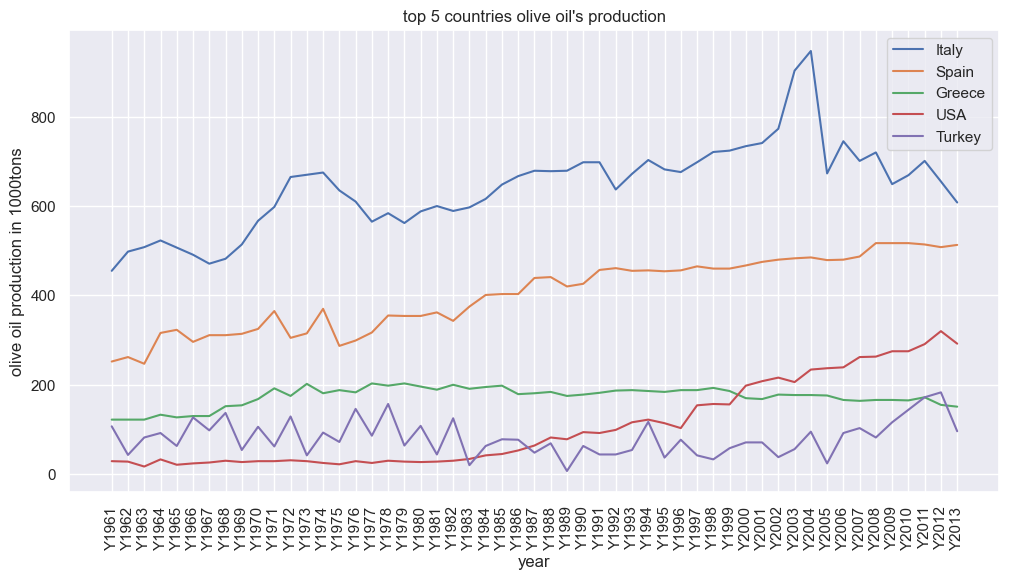

In [24]:
fao_oil = fao_impact[fao_impact["Item Code"] == 2580].sort_values(by= "mean", ascending= False)

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_oil.iloc[0,2:55], label = "Italy")
sns.lineplot(data=fao_oil.iloc[1,2:55], label = "Spain")
sns.lineplot(data=fao_oil.iloc[2,2:55], label = "Greece")
sns.lineplot(data=fao_oil.iloc[3,2:55], label = "USA")
sns.lineplot(data=fao_oil.iloc[4,2:55], label = "Turkey")

plt.title("top 5 countries olive oil's production")
plt.xticks(rotation = 90)
plt.ylabel("olive oil production in 1000tons")
plt.xlabel("year")

Text(0.5, 0, 'year')

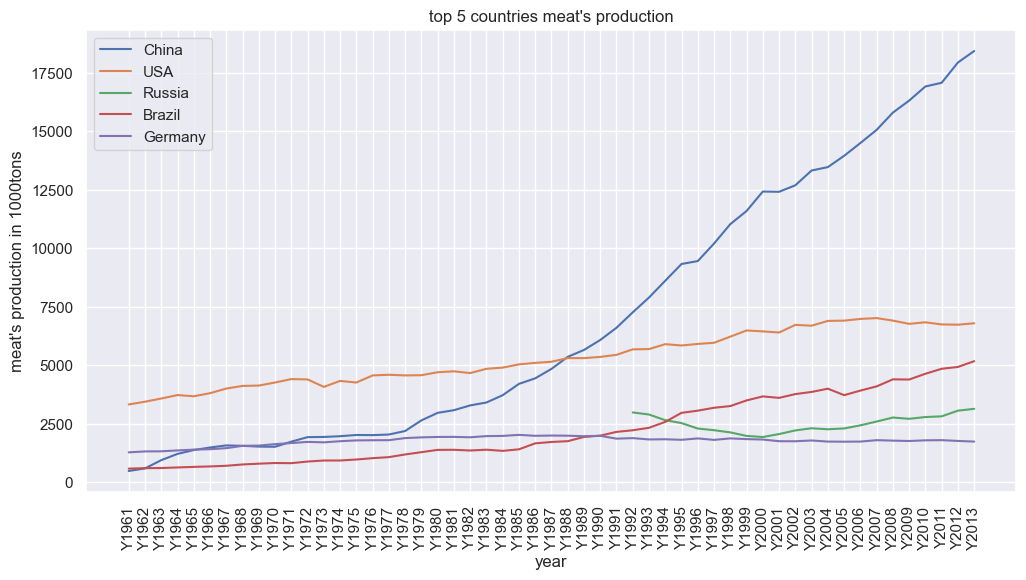

In [25]:
code = {range(2731,2738), 2943, 2945, 2946}
fao_meat = fao_impact[fao_impact["Item Code"].isin(code)].groupby("Area")[years].mean()
fao_meat["mean"] = fao_meat[years].mean(axis=1)
fao_meat.sort_values(by= "mean", ascending= False, inplace=True)

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_meat.iloc[0,0:53], label = "China")
sns.lineplot(data=fao_meat.iloc[1,0:53], label = "USA")
sns.lineplot(data=fao_meat.iloc[2,0:53], label = "Russia")
sns.lineplot(data=fao_meat.iloc[3,0:53], label = "Brazil")
sns.lineplot(data=fao_meat.iloc[4,0:53], label = "Germany")

plt.title("top 5 countries meat's production")
plt.xticks(rotation = 90)
plt.ylabel("meat's production in 1000tons")
plt.xlabel("year")

Non si evidenziano inversioni di tendenza nella produzione alimentare dei prodotti ad alto impatto tra i maggiori produttori mondiali

individuo i paesi che hanno modificato la loro produzione facendo la differenza tra la produzione nel 2013 e nel 1993 (20 anni prima), ovvero quando i cambiamenti climatici hanno iniziato a diventare un problema, ricordando che il protocollo di Kyoto è stato stilato nel 1997.

In [26]:
fao_impact["diff"] = fao_impact["Y2013"] - fao_impact["Y1993"]

Text(0.5, 0, 'year')

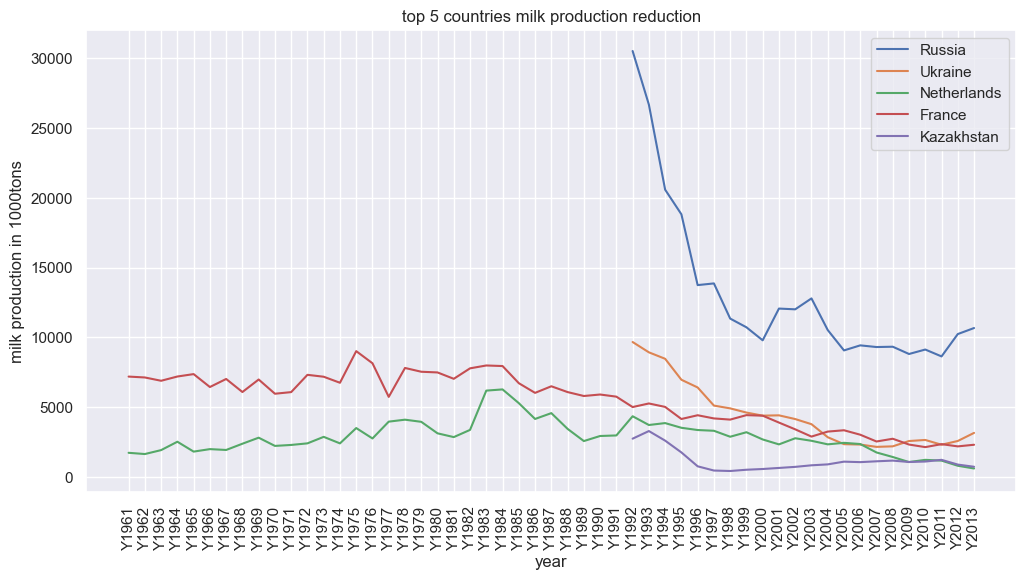

In [27]:
fao_milk = fao_impact[fao_impact["Item Code"] == 2848].sort_values(by= "diff")

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_milk.iloc[0,2:55], label = "Russia")
sns.lineplot(data=fao_milk.iloc[1,2:55], label = "Ukraine")
sns.lineplot(data=fao_milk.iloc[2,2:55], label = "Netherlands")
sns.lineplot(data=fao_milk.iloc[3,2:55], label = "France")
sns.lineplot(data=fao_milk.iloc[4,2:55], label = "Kazakhstan")

plt.title("top 5 countries milk production reduction")
plt.xticks(rotation = 90)
plt.ylabel("milk production in 1000tons")
plt.xlabel("year")

Text(0.5, 0, 'year')

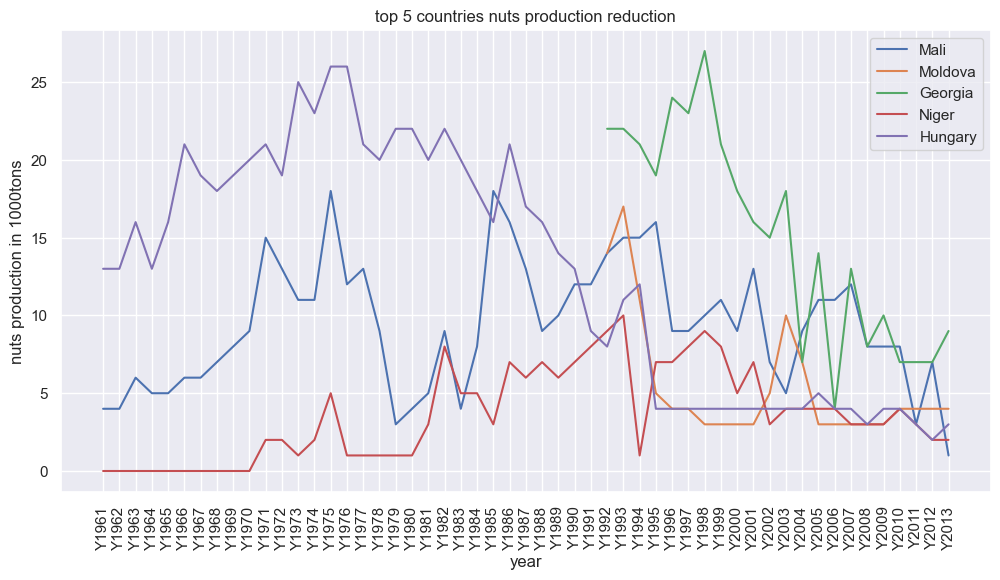

In [28]:
fao_nuts = fao_impact[fao_impact["Item Code"] == 2551].sort_values(by= "diff")

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_nuts.iloc[0,2:55], label = "Mali")
sns.lineplot(data=fao_nuts.iloc[1,2:55], label = "Moldova")
sns.lineplot(data=fao_nuts.iloc[2,2:55], label = "Georgia")
sns.lineplot(data=fao_nuts.iloc[3,2:55], label = "Niger")
sns.lineplot(data=fao_nuts.iloc[4,2:55], label = "Hungary")

plt.title("top 5 countries nuts production reduction")
plt.xticks(rotation = 90)
plt.ylabel("nuts production in 1000tons")
plt.xlabel("year")

Text(0.5, 0, 'year')

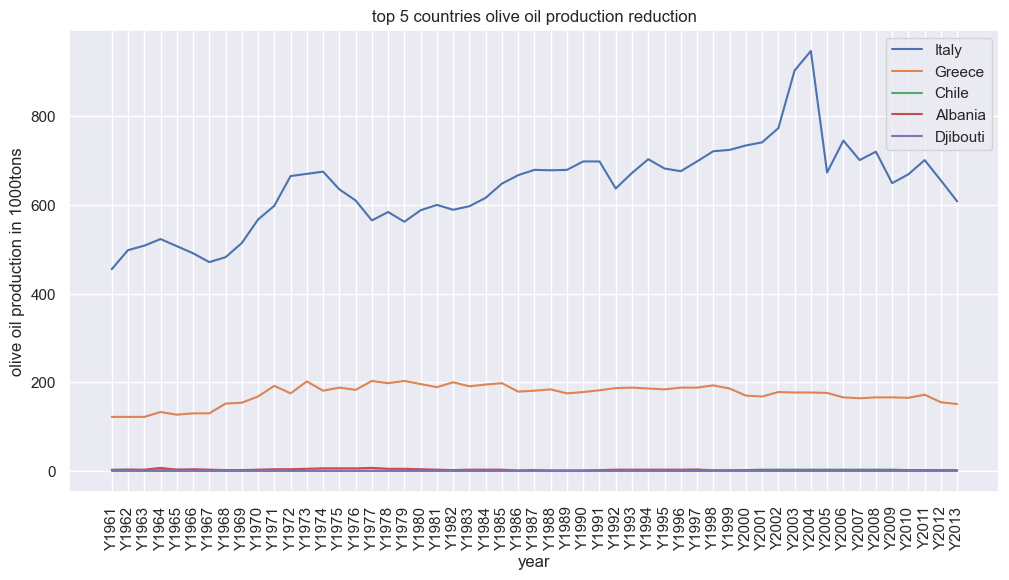

In [29]:
fao_oil = fao_impact[fao_impact["Item Code"] == 2580].sort_values(by= "diff")

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_oil.iloc[0,2:55], label = "Italy")
sns.lineplot(data=fao_oil.iloc[1,2:55], label = "Greece")
sns.lineplot(data=fao_oil.iloc[2,2:55], label = "Chile")
sns.lineplot(data=fao_oil.iloc[3,2:55], label = "Albania")
sns.lineplot(data=fao_oil.iloc[4,2:55], label = "Djibouti")

plt.title("top 5 countries olive oil production reduction")
plt.xticks(rotation = 90)
plt.ylabel("olive oil production in 1000tons")
plt.xlabel("year")

Text(0.5, 0, 'year')

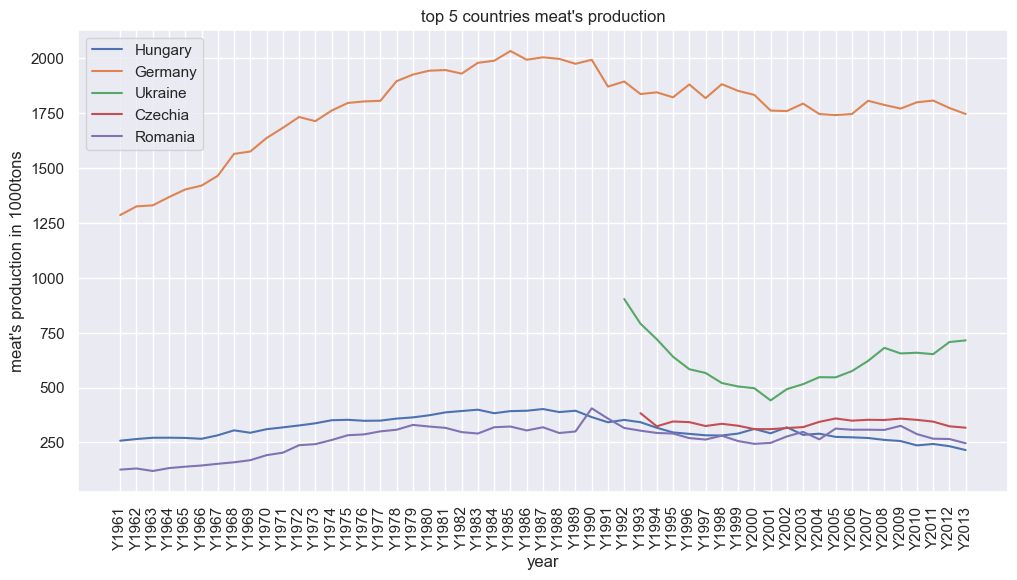

In [30]:
code = {range(2731,2738), 2943, 2945, 2946}
fao_meat = fao_impact[fao_impact["Item Code"].isin(code)].groupby("Area")[years].mean()
fao_meat["diff"] = fao_meat["Y2013"] - fao_meat["Y1993"]
fao_meat.sort_values(by= "diff", inplace=True)

plt.subplots(figsize=(12,6))
sns.lineplot(data=fao_meat.iloc[0,0:53], label = "Hungary")
sns.lineplot(data=fao_meat.iloc[1,0:53], label = "Germany")
sns.lineplot(data=fao_meat.iloc[2,0:53], label = "Ukraine")
sns.lineplot(data=fao_meat.iloc[3,0:53], label = "Czechia")
sns.lineplot(data=fao_meat.iloc[4,0:53], label = "Romania")

plt.title("top 5 countries meat's production")
plt.xticks(rotation = 90)
plt.ylabel("meat's production in 1000tons")
plt.xlabel("year")

sono state considerate le produzioni assolute e non relative nella singola nazione. Per individuare anche le nazioni più piccole che più si sono impegnate nella riduzione della produzione è necessario effettuare una normalizzazione dei dati.


Attualmente il cibo prodotto nel mondo è sufficiente a sfamare circa 13 miliardi di persone, nonostante ciò molta gente ancora muore di fame, a causa della distribuzione iniqua delle risorse e dello spreco alimentare: oltre il 40% del cibo prodotto non finisce mai sulla tavola ma viene semplicemente buttato via. Oltre che modificare la produzione è necessario combattere anche gli sprechi alimentari